
# **Line, Circle and Blob Detection**

1. Houghlines
2. Probabilistic Houghlines
3. Hough Circles
4. Blob Detection

In [6]:
# Our Setup, Import Libaries, Create our Imshow Function
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 6):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

houghlines - algorithm used to find lines in images

## **Line Detection - Using Hough Lines**
   
The Hough transform takes a binary edge map as input and attempts to locate edges placed as straight lines. The idea of the Hough transform is, that every edge point in the edge map is transformed to all possible lines that could pass through that point.

`cv2.HoughLines(binarized/thresholded image, 𝜌 accuracy, 𝜃 accuracy, threshold)`
- Threshold here is the minimum vote for it to be considered a line


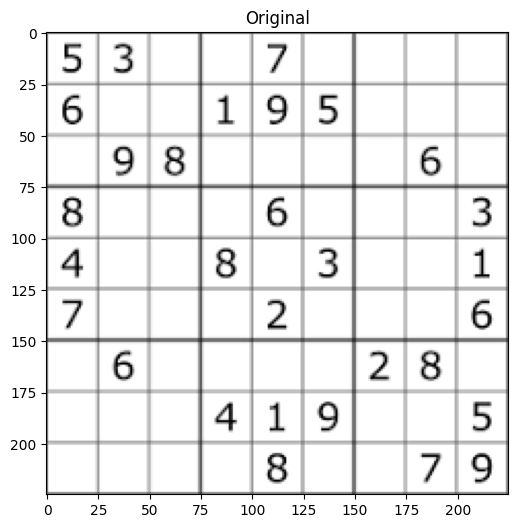

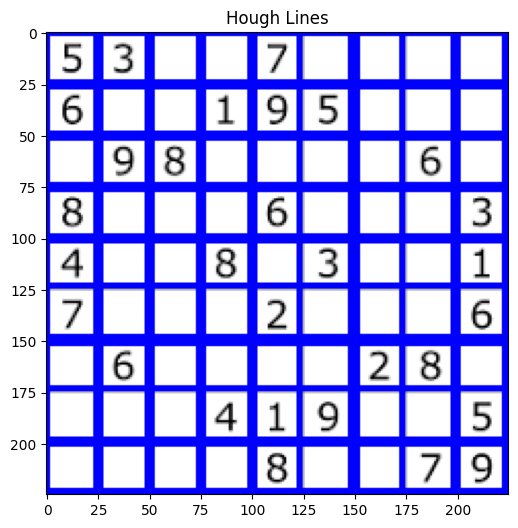

In [8]:
image = cv2.imread('sudoku.png')
imshow('Original', image)

# Grayscale and Canny Edges extracted
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 170, apertureSize = 3)
# apertureSize = 3 → Uses a 3x3 Sobel kernel.

# Run HoughLines using a rho accuracy of 1 pixel
# theta accuracy of np.pi / 180 which is 1 degree
# Our line threshold is set to 240 (number of points on line)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 140)

# We iterate through each line and convert it to the format
# required by cv2.lines (i.e. requiring end points)
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

imshow('Hough Lines', image)

# HoughLines() returns ρ (distance from origin) and θ (angle of the line).
# Converts from polar coordinates (ρ, θ) → Cartesian coordinates (x, y).
# The 1000 multiplier extends the lines beyond the image size.
# Ensures full-length grid lines.

Use Case:

Grid detection (Sudoku, graphs, tables).
Lane detection in self-driving cars.
Structural line extraction in images. However -- computationally expensive

Uses Hough Transform to detect straight lines in the edge-detected image.
Parameters:
1 → ρ (rho) = 1 pixel accuracy (distance resolution).
np.pi / 180 → θ (theta) = 1° accuracy.
240 → Minimum vote threshold (number of points on the line).
Higher threshold = detect only prominent lines.

## **Probabilistic Hough Lines**
A Hough Transform is considered probabilistic if it uses random sampling of the edge points. These algorithms can be divided based on how they map image space to parameter space.

```
cv2.HoughLinesP(binarized image, 𝜌 accuracy, 𝜃 accuracy, threshold, minimum line length, max line gap)
```





(238, 1, 4)


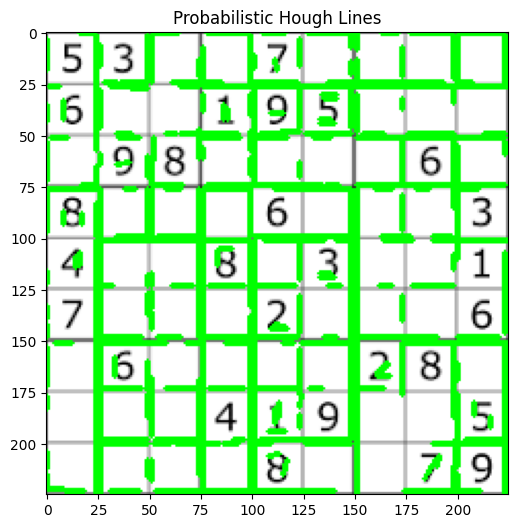

In [16]:
# Grayscale and Canny Edges extracted
image = cv2.imread('sudoku.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 170, apertureSize = 3)

# Again we use the same rho and theta accuracies
# However, we specific a minimum vote (pts along line) of 100
# and Min line length of 3 pixels and max gap between lines of 25 pixels
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 10, 3, 5)
print(lines.shape)

for x in range(0, len(lines)):
    for x1,y1,x2,y2 in lines[x]:
        cv2.line(image,(x1,y1),(x2,y2),(0,255,0),2)

imshow('Probabilistic Hough Lines', image)

Key Differences from Standard Hough Transform
Probabilistic Hough Transform (HoughLinesP) detects line segments instead of infinite lines.
More efficient, as it does not detect redundant long lines.
Helps in structured images like grids (Sudoku), roads, and buildings.

## **Circle Detection - Hough Cirlces**

**cv2.HoughCircles**(image, method, dp, MinDist, param1, param2, minRadius, MaxRadius)


- Method - currently only cv2.HOUGH_GRADIENT available
- dp - Inverse ratio of accumulator resolution
- MinDist - the minimum distance between the center of detected circles
- param1 - Gradient value used in the edge detection
- param2 - Accumulator threshold for the HOUGH_GRADIENT method (lower allows more circles to be detected (false positives))
- minRadius - limits the smallest circle to this size (via radius)
- MaxRadius - similarly sets the limit for the largest circles



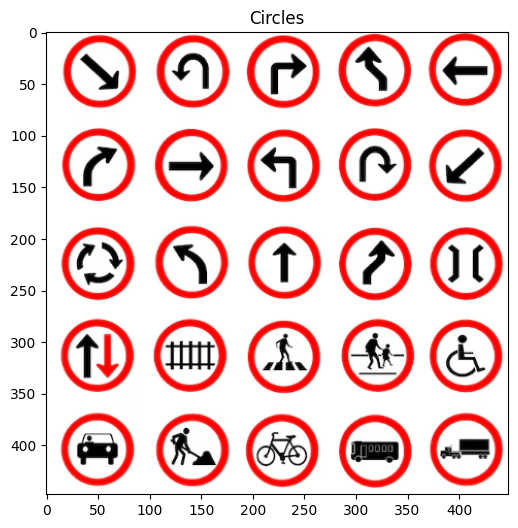

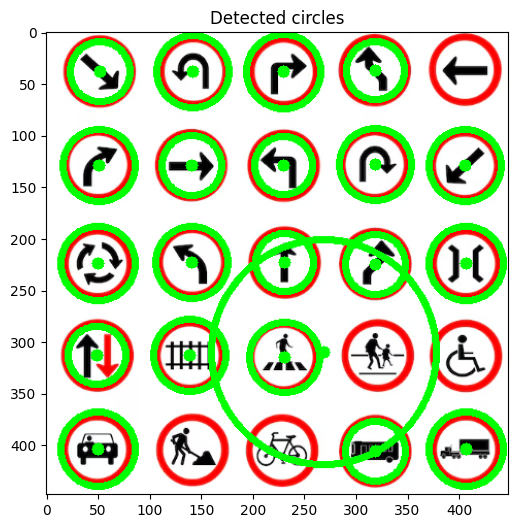

In [21]:
image = cv2.imread('street_signs.png')
imshow('Circles', image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blur = cv2.medianBlur(gray, 5)
# Apply Median Blur to Reduce Noise (5-kernel size)

circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, 1.2, 10)
circles = np.uint16(np.around(circles))  # converts to int

for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(image,(i[0], i[1]), i[2], (0, 255, 0), 5)  #i is a list [x, y, r] for each circle.

    # draw the center of the circle
    cv2.circle(image, (i[0], i[1]), 2, (0, 255, 0), 8)

imshow('Detected circles', image)


Hough Circle Transform works best on grayscale images, as it detects intensity changes.

# Parameters:
- cv2.HOUGH_GRADIENT: The detection method (gradient-based Hough Transform).
- 1.2: The inverse resolution ratio (higher values detect fewer circles).
- 20: The minimum distance between detected circle centers (prevents multiple detections of the same object).
-----------

- for i in circles[0,:] iterates through each detected circle.
- cv2.circle(image, (i[0], i[1]), i[2], (0, 255, 0), 5) draws the outer circle.
- cv2.circle(image, (i[0], i[1]), 2, (0, 255, 0), 8) marks the center of the circle.

## **Blob Detection**
The function **cv2.drawKeypoints** takes the following arguments:

**cv2.drawKeypoints**(input image, keypoints, blank_output_array, color, flags)

flags:
- cv2.DRAW_MATCHES_FLAGS_DEFAULT
- cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
- cv2.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG
- cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS

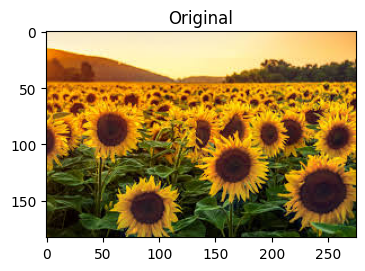

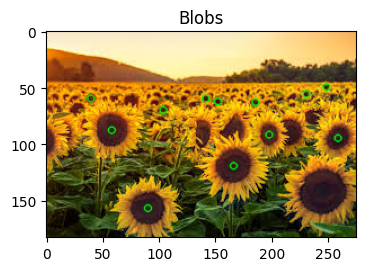

In [26]:
# Read image
image = cv2.imread("sunflowers.jpeg")
imshow("Original", image)

# Set up the detector with default parameters.
detector = cv2.SimpleBlobDetector_create()

# Detect blobs.
keypoints = detector.detect(image)

# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of
# the circle corresponds to the size of blob
blobs = cv2.drawKeypoints(image, keypoints,None, (0,255,0),cv2.DRAW_MATCHES_FLAGS_DEFAULT)

# Show keypoints
imshow("Blobs", blobs)

The detect() function finds all blobs in the image and stores them as keypoints.
Each keypoint contains:
(x, y) coordinates of the blob center.
The size (radius) of the blob.